In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
import numpy as np
import reshape
import reshapeHalf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotFW
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
#lets try a whole bunch of models to see if accuracy changes at all
logisticRegr = LogisticRegression(solver = 'lbfgs')
clf = LinearSVC()
Rclf=RidgeClassifier()

#Lets load up different types of data to see what changes
#Load motor FC from MSC02 matching time for resting FC
QmotorFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/MSC02_parcel_corrmat.mat')
#Load rest
QrestFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/timeQuality_rest/motor/MSC02_parcel_corrmat.mat')
Qtrain_rest, Qtest_rest = train_test_split(QrestFC, test_size=.2)
Qx_train=np.concatenate((QmotorFC, Qtrain_rest))
QtaskSize=QmotorFC.shape[0]
QrestSize=Qtrain_rest.shape[0]
Qt = np.ones(QtaskSize, dtype = int)
Qr=np.zeros(QrestSize, dtype=int)
Qy_train = np.concatenate((Qt,Qr))


#Load motor FC from MSC02 more time points (20)
HmotorFC=reshapeHalf.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/corrmats_timesplit/half/MSC02_parcel_corrmat.mat')
#Load rest
HrestFC=reshapeHalf.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/corrmats_timesplit/half/MSC02_parcel_corrmat.mat')
Htrain_rest, Htest_rest = train_test_split(HrestFC, test_size=.2)
Hx_train=np.concatenate((HmotorFC, Htrain_rest))
HtaskSize=HmotorFC.shape[0]
HrestSize=Htrain_rest.shape[0]
Ht = np.ones(HtaskSize, dtype = int)
Hr=np.zeros(HrestSize, dtype=int)
Hy_train = np.concatenate((Ht,Hr))

#Load motor FC from MSC02 in regular format
RmotorFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/MSC02_parcel_corrmat.mat')
#Load rest
RrestFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/MSC02_parcel_corrmat.mat')
#Create a training dataset targets 1/0 ==task/rest, chunk=#days
Rtrain_rest, Rtest_rest = train_test_split(RrestFC, test_size=.2)
Rx_train=np.concatenate((RmotorFC, Rtrain_rest))
RtaskSize=RmotorFC.shape[0]
RrestSize=Rtrain_rest.shape[0]
Rt = np.ones(RtaskSize, dtype = int)
Rr=np.zeros(RrestSize, dtype=int)
Ry_train = np.concatenate((Rt,Rr))


#Load mixed FC from MSC02 using Quality rest Q
mixFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mixed/MSC02_parcel_corrmat.mat')
Qmix=np.concatenate((mixFC, Qtest_rest))
#Create testing dataset
QmixSize=mixFC.shape[0]
QrSize=Qtest_rest.shape[0]
Qtt = np.ones(QmixSize, dtype = int)
Qtr=np.zeros(QrSize, dtype=int)
Qmix_test = np.concatenate((Qtt,Qtr))


#mixedFC more time points H
HmixFC=reshapeHalf.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mixed/corrmats_timesplit/half/AllGlass/MSC02_parcel_corrmat.mat')
Hmix=np.concatenate((HmixFC, Htest_rest))
#Create testing dataset
HmixSize=HmixFC.shape[0]
HrSize=Htest_rest.shape[0]
Htt = np.ones(HmixSize, dtype = int)
Htr=np.zeros(HrSize, dtype=int)
Hmix_test = np.concatenate((Htt,Htr))

#mixedFC in regular format R
Rmix=np.concatenate((mixFC, Rtest_rest))
#Create testing dataset
RmixSize=mixFC.shape[0]
RrSize=Rtest_rest.shape[0]
Rtt = np.ones(RmixSize, dtype = int)
Rtr=np.zeros(RrSize, dtype=int)
Rmix_test = np.concatenate((Rtt,Rtr))



#Load memory FC from MSC02 using Quality rest Q
memFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/MSC02_parcel_corrmat.mat')
Qmem=np.concatenate((memFC, Qtest_rest))
#Create testing dataset
QmemSize=memFC.shape[0]
Qmemtr = np.ones(QmemSize, dtype = int)
Qmem_test = np.concatenate((Qmemtr,Qtr))


#memFC more time points H
HmemFC=reshapeHalf.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/corrmats_timesplit/half/MSC02_parcel_corrmat.mat')
Hmem=np.concatenate((HmemFC, Htest_rest))
#Create testing dataset
HmemSize=HmemFC.shape[0]
Hmemtr = np.ones(HmemSize, dtype = int)
Hmem_test = np.concatenate((Hmemtr,Htr))

#memFC in regular format R
Rmem=np.concatenate((memFC, Rtest_rest))
#Create testing dataset
RmemSize=mixFC.shape[0]
Rmemtr = np.ones(RmemSize, dtype = int)
Rmem_test = np.concatenate((Rmemtr,Rtr))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


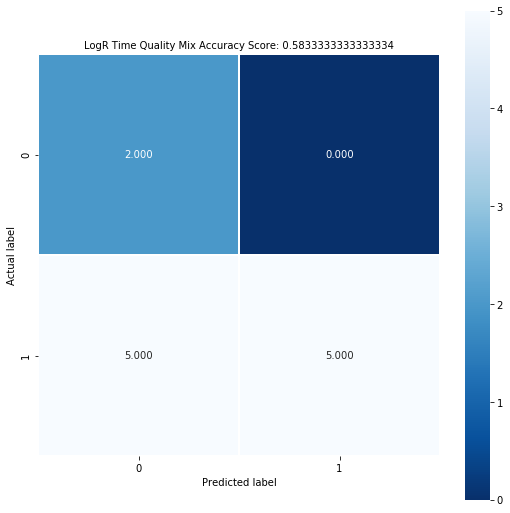

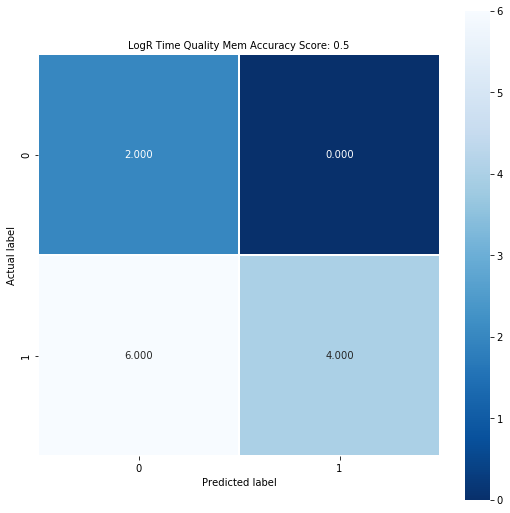

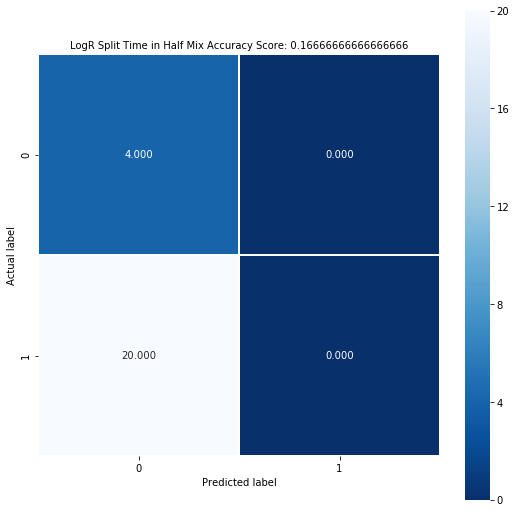

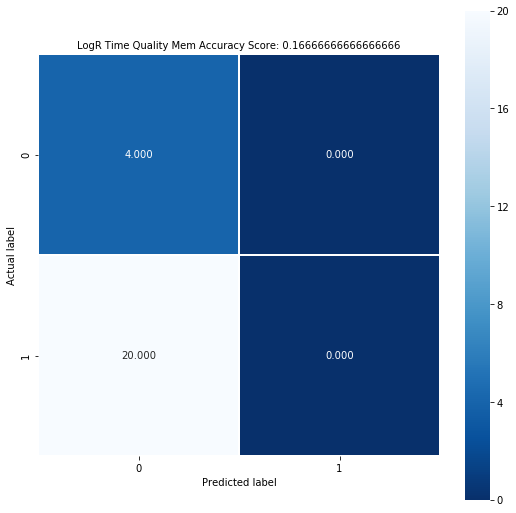

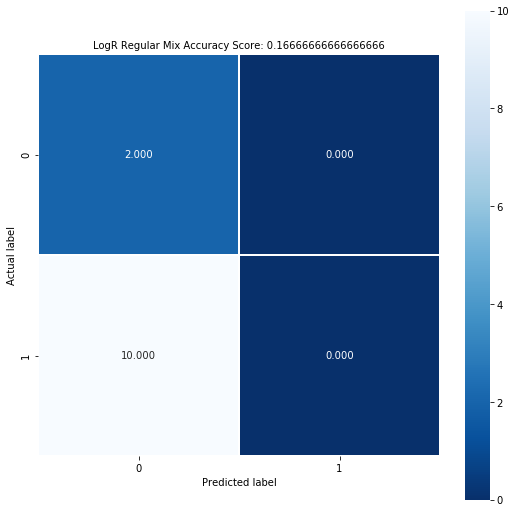

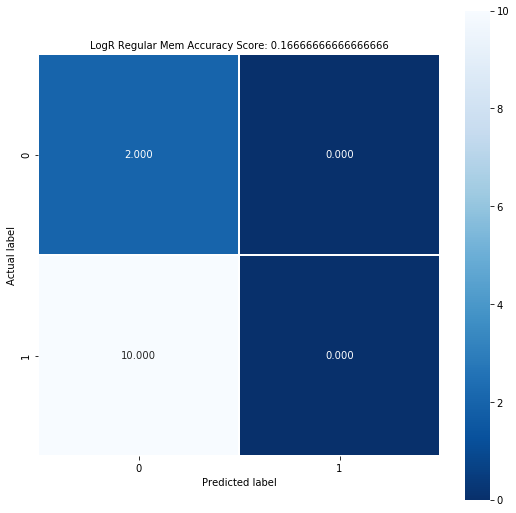

In [14]:
#log regression Testing mixed
#using matched time Q
#log regression results
logisticRegr.fit(Qx_train, Qy_train)
#Cross validation
CVscores=cross_val_score(logisticRegr, Qx_train, Qy_train, cv=QtaskSize)
Qp=logisticRegr.predict(Qmix)
# Use score method to get accuracy of model
score = logisticRegr.score(Qmix, Qmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmix_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Time Quality Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Qmotor_train_mixed_test_MSC02.png")


#Testing memory Q
Qp=logisticRegr.predict(Qmem)
# Use score method to get accuracy of model
score = logisticRegr.score(Qmem, Qmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmem_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Qmotor_train_mem_test_MSC02.png")


#log regression Testing mixed
#using more data points H
#log regression results
logisticRegr.fit(Hx_train, Hy_train)
#Cross validation
CVscores=cross_val_score(logisticRegr, Hx_train, Hy_train, cv=HtaskSize)
Hp=logisticRegr.predict(Hmix)
# Use score method to get accuracy of model
score = logisticRegr.score(Hmix, Hmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmix_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Split Time in Half Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Hmotor_train_mixed_test_MSC02.png")


#Testing memory H
Hp=logisticRegr.predict(Hmem)
# Use score method to get accuracy of model
score = logisticRegr.score(Hmem, Hmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmem_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Hmotor_train_mem_test_MSC02.png")


#log regression Testing mixed
#using regular data R
#log regression results
logisticRegr.fit(Rx_train, Ry_train)
#Cross validation
CVscores=cross_val_score(logisticRegr, Rx_train, Ry_train, cv=RtaskSize)
Rp=logisticRegr.predict(Rmix)
# Use score method to get accuracy of model
score = logisticRegr.score(Rmix, Rmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmix_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Regular Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Rmotor_train_mixed_test_MSC02.png")


#Testing memory H
Rp=logisticRegr.predict(Rmem)
# Use score method to get accuracy of model
score = logisticRegr.score(Rmem, Rmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmem_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'LogR Regular Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/logReg/cm/SS/debug/Rmotor_train_mem_test_MSC02.png")


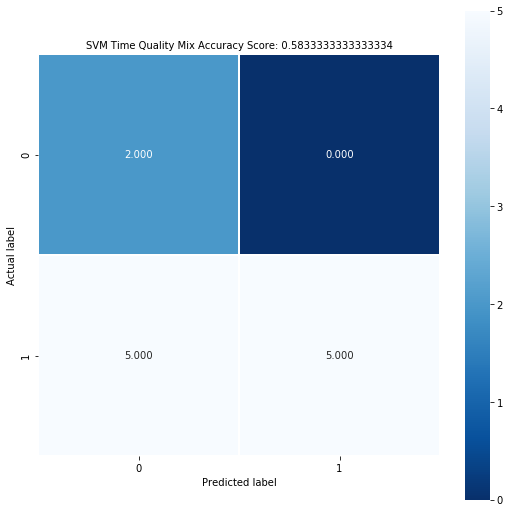

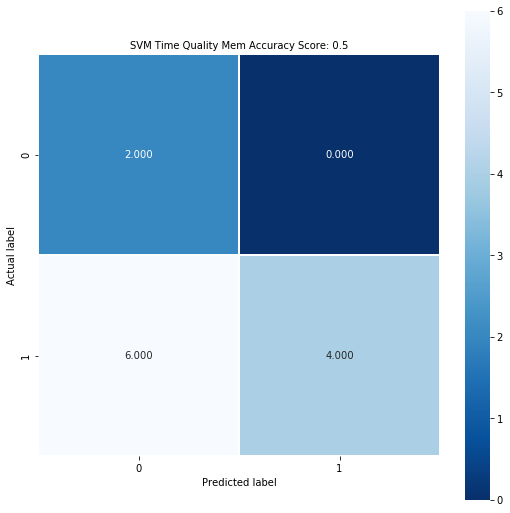

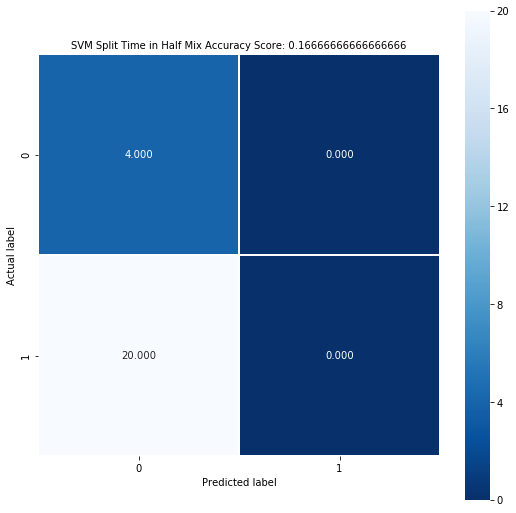

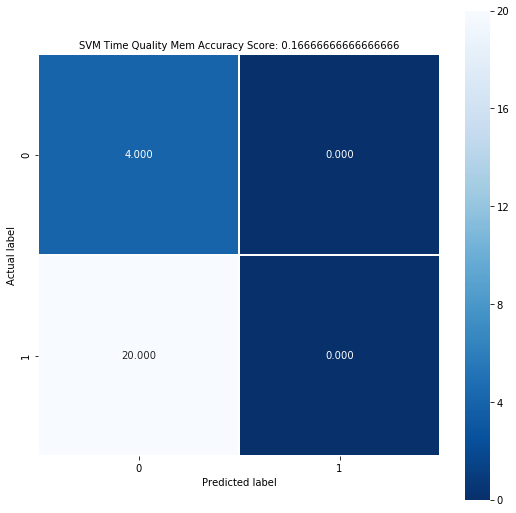

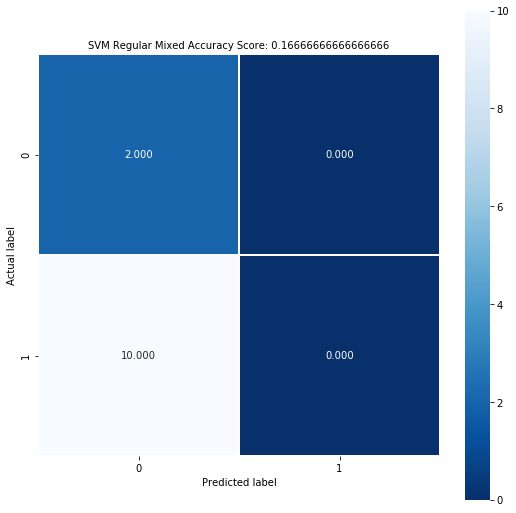

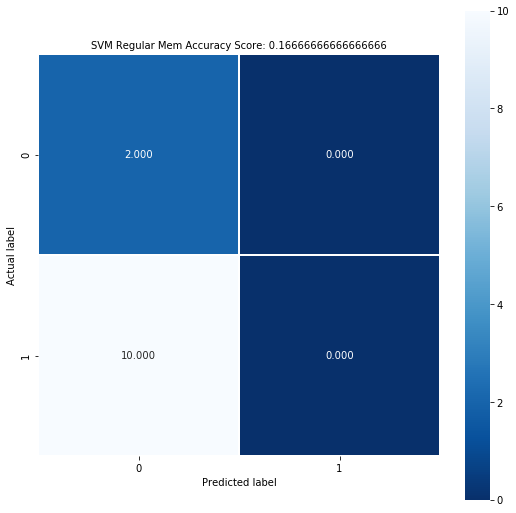

In [15]:
#SVM Testing mixed
#using matched time Q

clf.fit(Qx_train, Qy_train)
#Cross validation
Qp=clf.predict(Qmix)
# Use score method to get accuracy of model
score = clf.score(Qmix, Qmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmix_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Time Quality Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Qmotor_train_mixed_test_MSC02.png")


#Testing memory Q
Qp=clf.predict(Qmem)
# Use score method to get accuracy of model
score = clf.score(Qmem, Qmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmem_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Qmotor_train_mem_test_MSC02.png")


#clf Testing mixed
#using more data points H
clf.fit(Hx_train, Hy_train)
#Cross validation
Hp=clf.predict(Hmix)
# Use score method to get accuracy of model
score = clf.score(Hmix, Hmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmix_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Split Time in Half Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Hmotor_train_mixed_test_MSC02.png")


#Testing memory H
Hp=clf.predict(Hmem)
# Use score method to get accuracy of model
score = clf.score(Hmem, Hmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmem_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Hmotor_train_mem_test_MSC02.png")

#svm Testing mixed
#using regular data R
clf.fit(Rx_train, Ry_train)
#Cross validation
Rp=clf.predict(Rmix)
# Use score method to get accuracy of model
score = clf.score(Rmix, Rmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmix_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Regular Mixed Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Rmotor_train_mixed_test_MSC02.png")


#Testing memory H
Rp=clf.predict(Rmem)
# Use score method to get accuracy of model
score = clf.score(Rmem, Rmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmem_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Regular Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Rmotor_train_mem_test_MSC02.png")


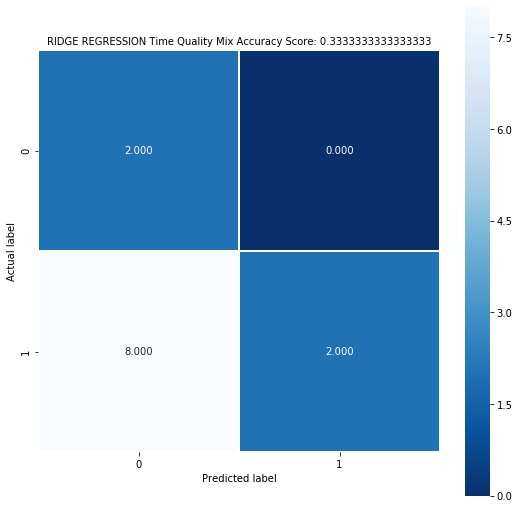

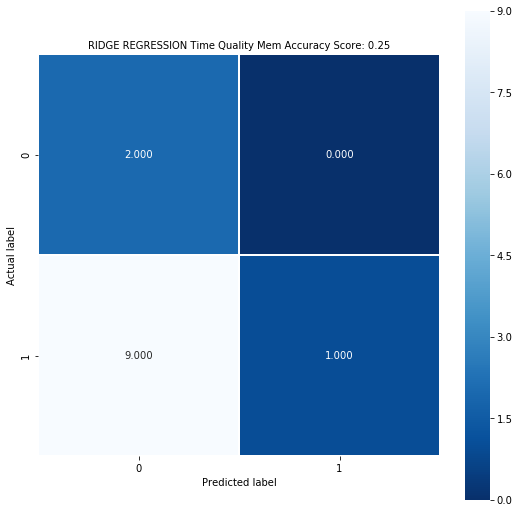

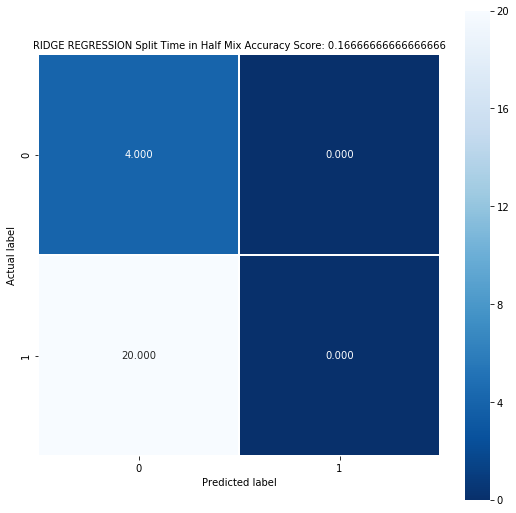

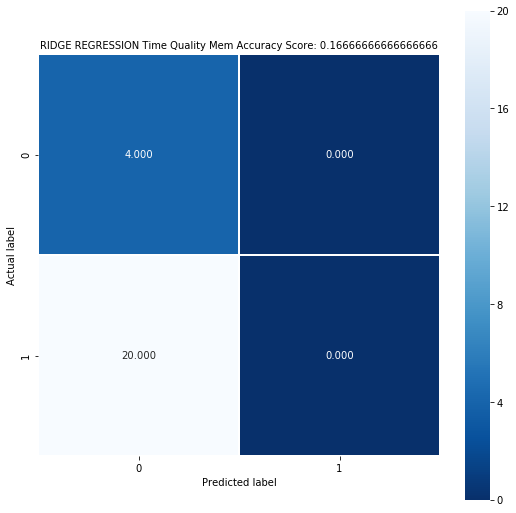

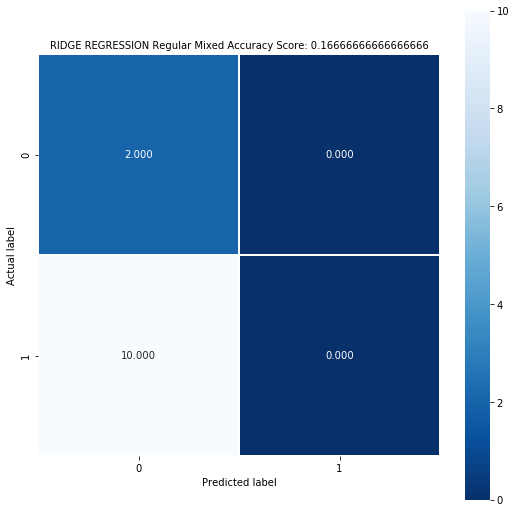

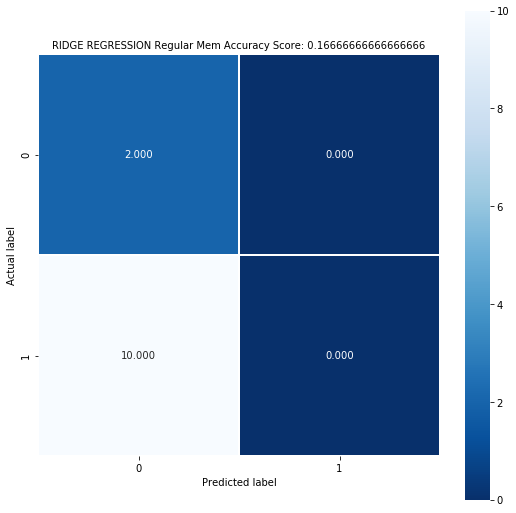

In [3]:
#Ridge Regression Testing mixed
#using matched time Q

Rclf.fit(Qx_train, Qy_train)
#Cross validation
Qp=Rclf.predict(Qmix)
# Use score method to get accuracy of model
score = Rclf.score(Qmix, Qmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmix_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Time Quality Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Qmotor_train_mixed_test_MSC02.png")


#Testing memory Q
Qp=Rclf.predict(Qmem)
# Use score method to get accuracy of model
score = Rclf.score(Qmem, Qmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Qmem_test, Qp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Qmotor_train_mem_test_MSC02.png")


#Rclf Testing mixed
#using more data points H
Rclf.fit(Hx_train, Hy_train)
#Cross validation
Hp=Rclf.predict(Hmix)
# Use score method to get accuracy of model
score = Rclf.score(Hmix, Hmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmix_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Split Time in Half Mix Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Hmotor_train_mixed_test_MSC02.png")


#Testing memory H
Hp=Rclf.predict(Hmem)
# Use score method to get accuracy of model
score = Rclf.score(Hmem, Hmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Hmem_test, Hp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Time Quality Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Hmotor_train_mem_test_MSC02.png")

#Ridge Regression Testing mixed
#using regular data R
Rclf.fit(Rx_train, Ry_train)
#Cross validation
Rp=Rclf.predict(Rmix)
# Use score method to get accuracy of model
score = Rclf.score(Rmix, Rmix_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmix_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Regular Mixed Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Rmotor_train_mixed_test_MSC02.png")


#Testing memory H
Rp=Rclf.predict(Rmem)
# Use score method to get accuracy of model
score = Rclf.score(Rmem, Rmem_test)
#construct a confusion matrix
cm = metrics.confusion_matrix(Rmem_test, Rp)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'RIDGE REGRESSION Regular Mem Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 10);
#plt.savefig("/Users/Alexis/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/SS/debug/Rmotor_train_mem_test_MSC02.png")
